In [8]:
# Importing necessary libraries for data analysis, visualization, and machine learning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score



In [9]:
# File input: Load the dataset
file = r'/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
original_data = pd.read_excel(file)



In [10]:
# Display first few rows of the data
print("Sample Data:")
original_data.head()



Sample Data:


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [11]:
# Handling categorical variables using one-hot encoding
original_data_encoded = pd.get_dummies(original_data, drop_first=True)

# Target column: PerformanceRating
target = original_data['PerformanceRating']



In [12]:
# Extract EmployeeDepartment for slicing the dataset by department
departments = original_data['EmpDepartment'].unique()

# Store feature importance results for each department
dept_feature_importance = {}

def evaluate_models(data, dept):
    # Separate features and target for each department
    X = data.drop(['PerformanceRating'], axis=1)  # Exclude the target column
    y = data['PerformanceRating']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Random Forest Model
    rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_predictions)

    # Gradient Boosting Model
    gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=4, random_state=42)
    gb_model.fit(X_train, y_train)
    gb_predictions = gb_model.predict(X_test)
    gb_accuracy = accuracy_score(y_test, gb_predictions)

    # Feature importance
    rf_feature_importance = rf_model.feature_importances_
    gb_feature_importance = gb_model.feature_importances_

    # Storing top 3 features for both models
    rf_top3_features = X.columns[np.argsort(rf_feature_importance)[-3:]]  # Top 3 features for Random Forest
    gb_top3_features = X.columns[np.argsort(gb_feature_importance)[-3:]]  # Top 3 features for Gradient Boosting

    # Store results in dictionary
    dept_feature_importance[dept] = {
        'Random Forest Accuracy': rf_accuracy,
        'Gradient Boosting Accuracy': gb_accuracy,
        'Top 3 Features (Random Forest)': rf_top3_features,
        'Top 3 Features (Gradient Boosting)': gb_top3_features
    }

    return rf_model, gb_model, X



In [13]:
# Function to plot feature importance
def plot_feature_importance(model, X, dept, model_name):
    plt.figure(figsize=(10, 6))
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances.nlargest(10).plot(kind='barh', color='teal')
    plt.title(f'Top 10 Important Features - {dept} ({model_name})')
    plt.xlabel('Importance Score')
    plt.show()


Department: Sales
Random Forest Accuracy: 0.7128
Top 3 Important Features (Random Forest): Index(['YearsSinceLastPromotion', 'EmpLastSalaryHikePercent',
       'EmpEnvironmentSatisfaction'],
      dtype='object')
Gradient Boosting Accuracy: 0.8830
Top 3 Important Features (Gradient Boosting): Index(['EmpLastSalaryHikePercent', 'YearsSinceLastPromotion',
       'EmpEnvironmentSatisfaction'],
      dtype='object')
---------------------------------------------------


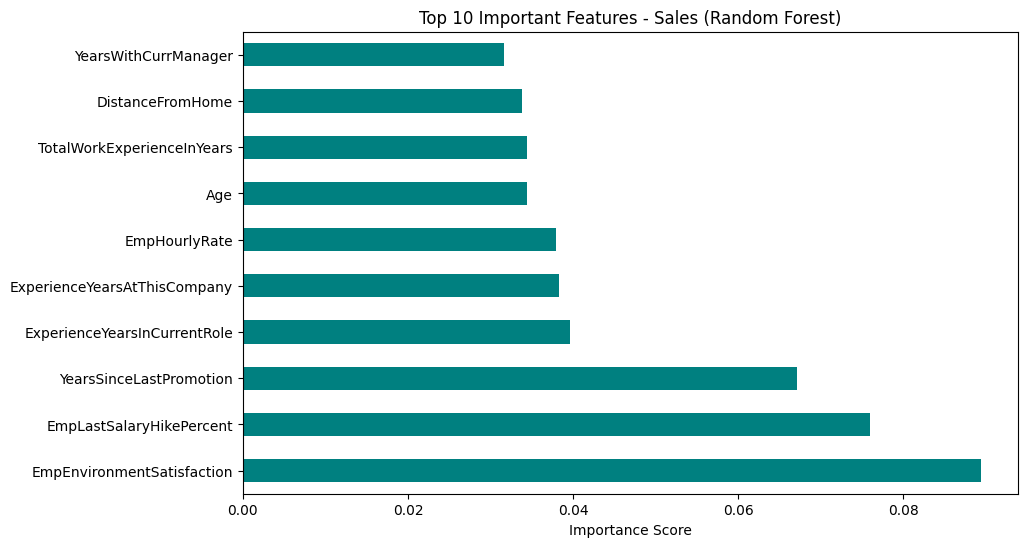

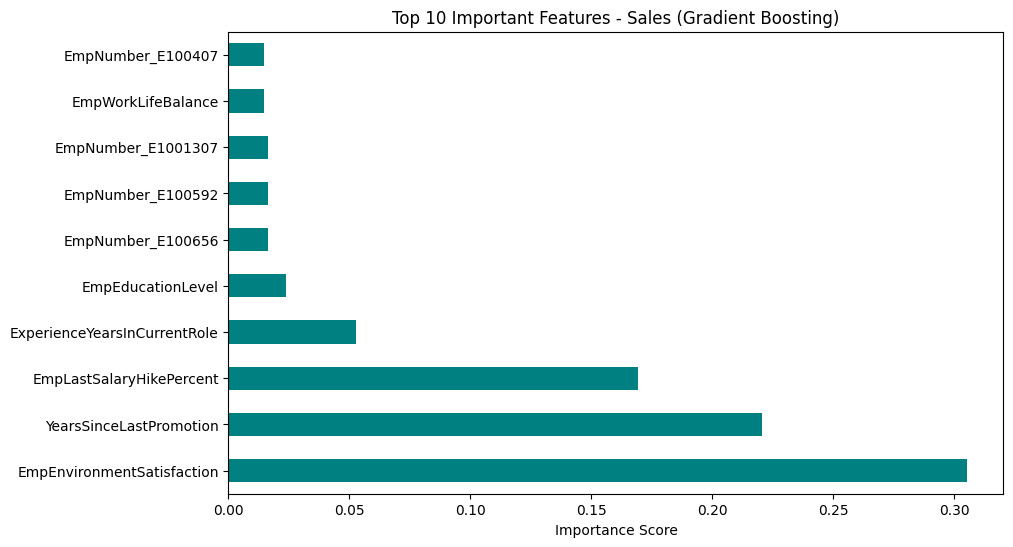


Department: Human Resources
Random Forest Accuracy: 0.7143
Top 3 Important Features (Random Forest): Index(['DistanceFromHome', 'EmpRelationshipSatisfaction', 'EmpHourlyRate'], dtype='object')
Gradient Boosting Accuracy: 0.8571
Top 3 Important Features (Gradient Boosting): Index(['EmpRelationshipSatisfaction', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate'],
      dtype='object')
---------------------------------------------------


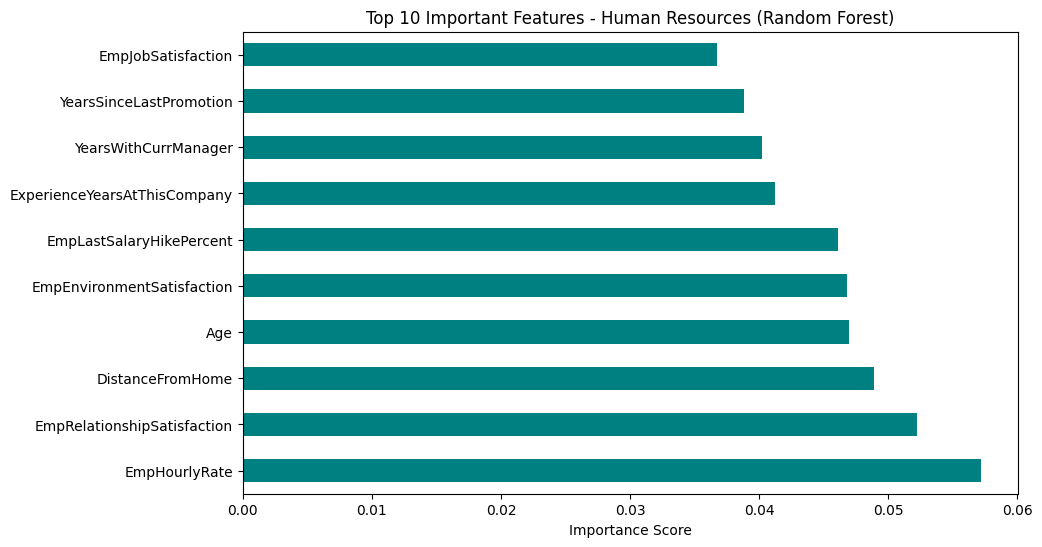

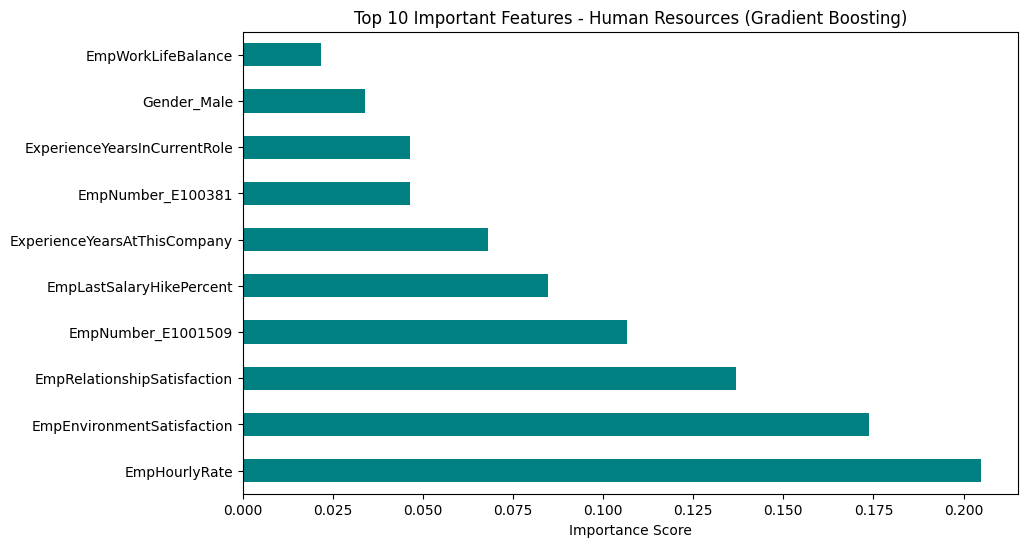


Department: Development
Random Forest Accuracy: 0.8462
Top 3 Important Features (Random Forest): Index(['EmpHourlyRate', 'Age', 'EmpLastSalaryHikePercent'], dtype='object')
Gradient Boosting Accuracy: 0.9560
Top 3 Important Features (Gradient Boosting): Index(['EmpWorkLifeBalance', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent'],
      dtype='object')
---------------------------------------------------


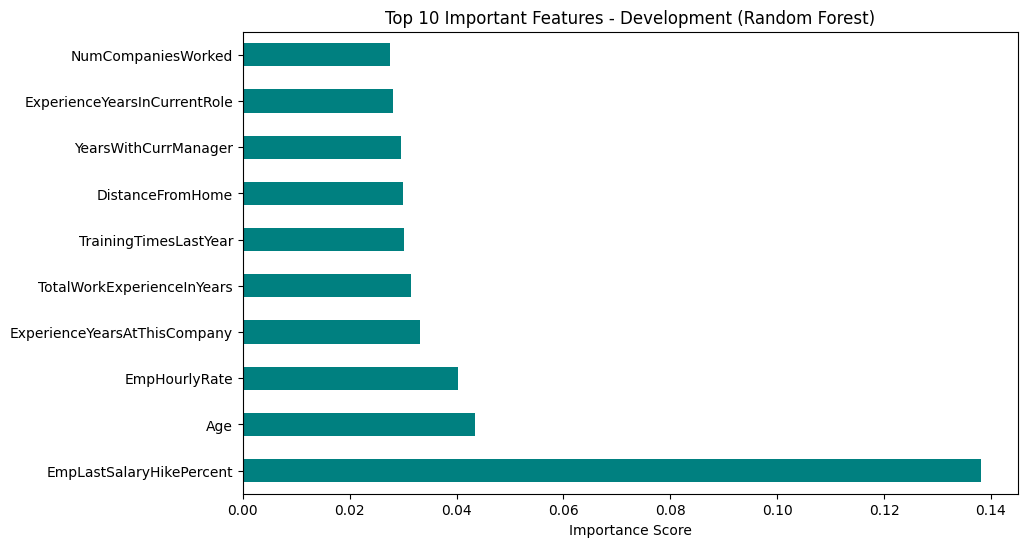

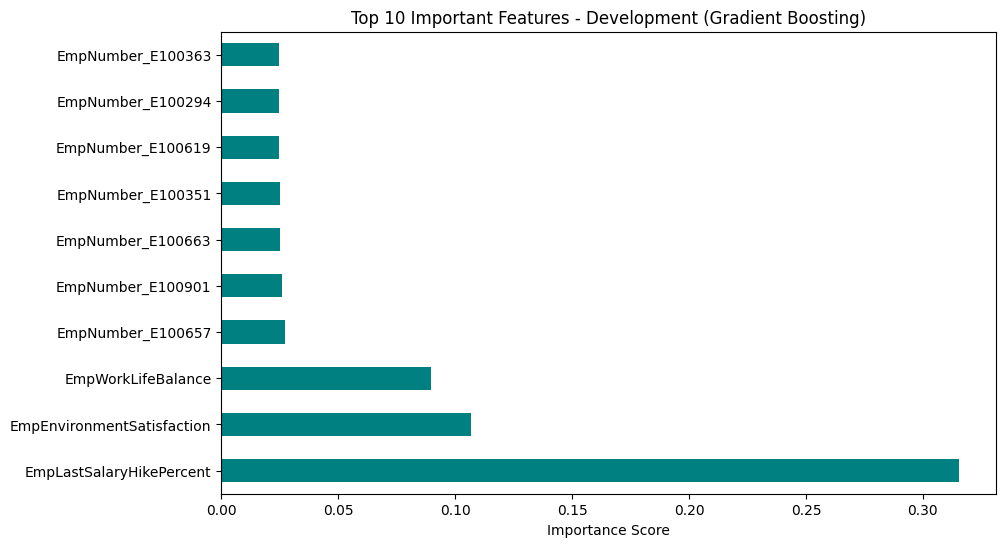


Department: Data Science
Random Forest Accuracy: 0.8000
Top 3 Important Features (Random Forest): Index(['YearsWithCurrManager', 'ExperienceYearsAtThisCompany',
       'TotalWorkExperienceInYears'],
      dtype='object')
Gradient Boosting Accuracy: 0.8000
Top 3 Important Features (Gradient Boosting): Index(['TotalWorkExperienceInYears', 'EmpNumber_E100630',
       'ExperienceYearsAtThisCompany'],
      dtype='object')
---------------------------------------------------


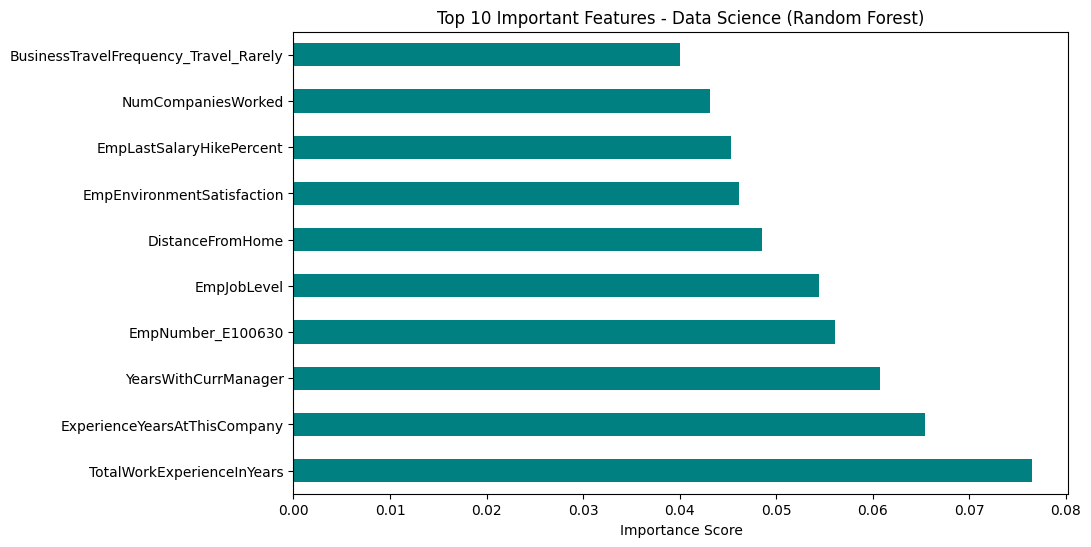

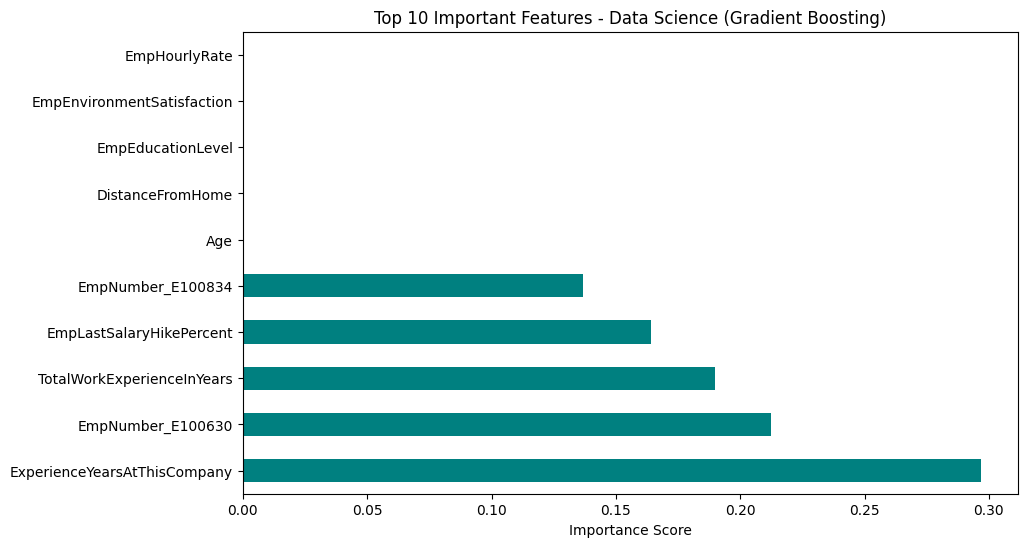


Department: Research & Development
Random Forest Accuracy: 0.7442
Top 3 Important Features (Random Forest): Index(['YearsSinceLastPromotion', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent'],
      dtype='object')
Gradient Boosting Accuracy: 0.9535
Top 3 Important Features (Gradient Boosting): Index(['EmpLastSalaryHikePercent', 'YearsSinceLastPromotion',
       'EmpEnvironmentSatisfaction'],
      dtype='object')
---------------------------------------------------


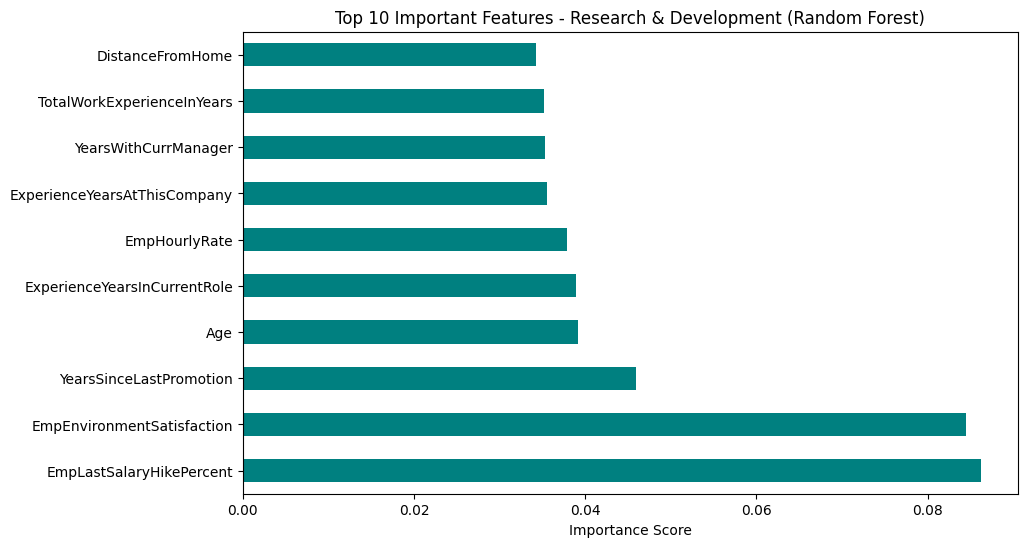

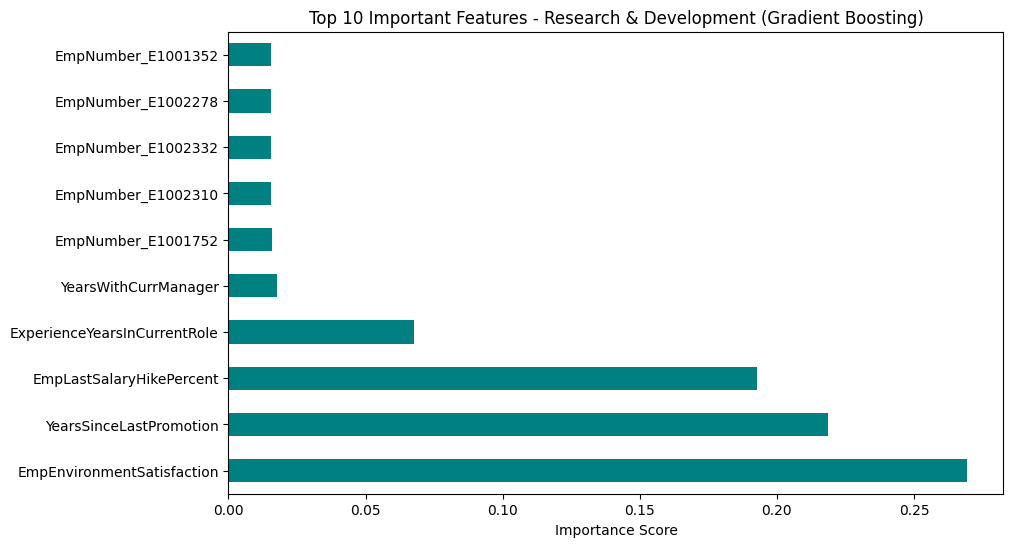


Department: Finance
Random Forest Accuracy: 0.6154
Top 3 Important Features (Random Forest): Index(['ExperienceYearsAtThisCompany', 'EmpLastSalaryHikePercent',
       'EmpEnvironmentSatisfaction'],
      dtype='object')
Gradient Boosting Accuracy: 0.9231
Top 3 Important Features (Gradient Boosting): Index(['YearsSinceLastPromotion', 'EmpLastSalaryHikePercent',
       'EmpEnvironmentSatisfaction'],
      dtype='object')
---------------------------------------------------


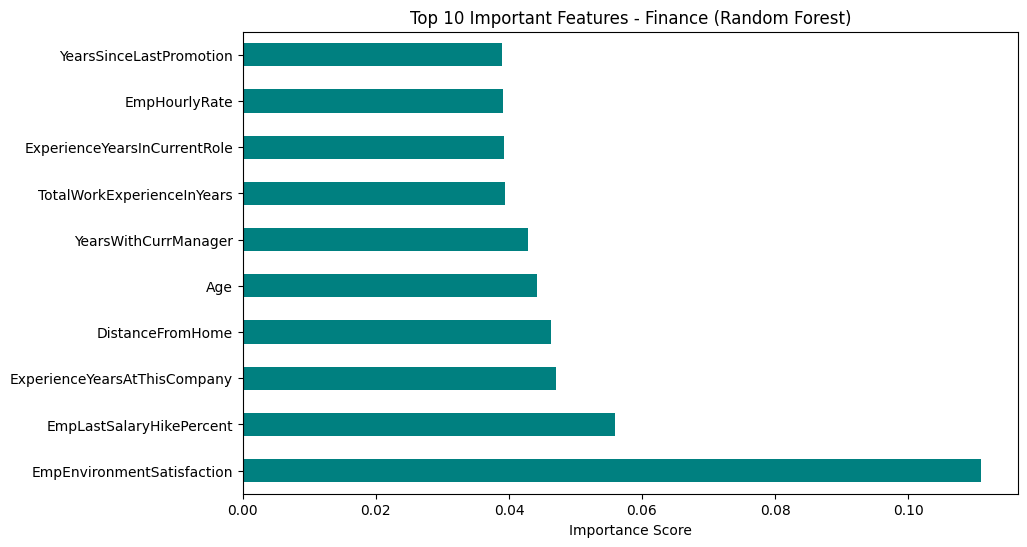

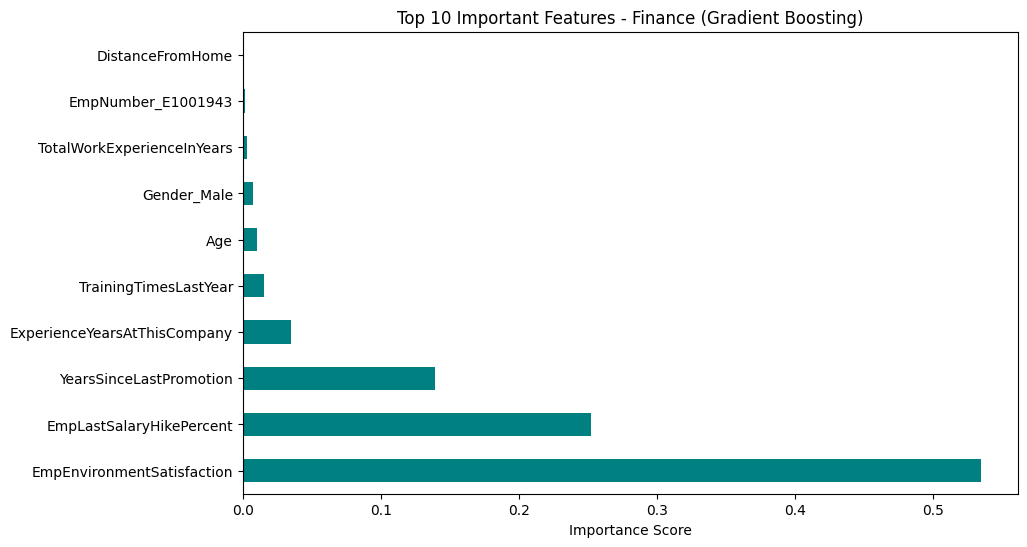

In [14]:
# Loop through each department and evaluate models
for dept in departments:
    department_data = original_data_encoded[original_data['EmpDepartment'] == dept]
    rf_model, gb_model, X = evaluate_models(department_data, dept)

    # Print department-wise feature importance and accuracies
    print(f"\nDepartment: {dept}")
    print(f"Random Forest Accuracy: {dept_feature_importance[dept]['Random Forest Accuracy']:.4f}")
    print(f"Top 3 Important Features (Random Forest): {dept_feature_importance[dept]['Top 3 Features (Random Forest)']}")
    print(f"Gradient Boosting Accuracy: {dept_feature_importance[dept]['Gradient Boosting Accuracy']:.4f}")
    print(f"Top 3 Important Features (Gradient Boosting): {dept_feature_importance[dept]['Top 3 Features (Gradient Boosting)']}")
    print("---------------------------------------------------")

    # Plot feature importance
    plot_feature_importance(rf_model, X, dept, 'Random Forest')
    plot_feature_importance(gb_model, X, dept, 'Gradient Boosting')




### Insights from the Notebook:

**Department-Wise Accuracy and Feature Importance:** The notebook evaluates Random Forest and Gradient Boosting models for each department, aiming to predict employee performance based on various features like salary hikes, job satisfaction, and tenure.

**Performance of Gradient Boosting over Random Forest:** Across all departments, the Gradient Boosting model consistently outperformed the Random Forest model in terms of accuracy. This suggests that Gradient Boosting is better at capturing the patterns in the dataset to predict employee performance.

**Top Important Features:**

Years Since Last Promotion and Salary Hike Percent are repeatedly seen as top features, especially in departments like Sales, Research & Development, and Finance. These factors play a crucial role in determining employee performance.

Work-Life Balance, Environment Satisfaction, and Job Satisfaction are also highly influential in departments like Development and Human Resources.

**Consistent Features Across Departments:**

EmpLastSalaryHikePercent appears frequently as a key feature, indicating that salary adjustments are a critical factor in employee performance across departments.

YearsSinceLastPromotion is another feature that is consistently important, highlighting the importance of career progression.

**Departmental Variations:**

Different departments show distinct influential features. For example, ExperienceYearsAtThisCompany is more important in the Finance and Data Science departments, while Work-Life Balance and Job Satisfaction are crucial in Human Resources and Development.

**Results of Each Department**

**Department: Sales**

Random Forest Accuracy: 71.28%

Gradient Boosting Accuracy: 88.30%

Top Features (Common):

Years Since Last Promotion

Last Salary Hike Percent

Environment Satisfaction

**Department: Human Resources**

Random Forest Accuracy: 71.43%

Gradient Boosting Accuracy: 85.71%

Top Features (Common):

Relationship Satisfaction

Environment Satisfaction

Hourly Rate

**Department: Development**

Random Forest Accuracy: 84.62%

Gradient Boosting Accuracy: 95.60%

Top Features (Common):

Work-Life Balance

Environment Satisfaction

Last Salary Hike Percent

**Department: Data Science**

Random Forest Accuracy: 80.00%

Gradient Boosting Accuracy: 80.00%

Top Features (Common):

Experience at Company

Total Work Experience

Manager Experience

**Department: Research & Development**

Random Forest Accuracy: 74.42%

Gradient Boosting Accuracy: 95.35%

Top Features (Common):

Last Salary Hike Percent

Years Since Last Promotion

Environment Satisfaction

**Department: Finance**

Random Forest Accuracy: 61.54%

Gradient Boosting Accuracy: 92.31%

Top Features (Common):

Years Since Last Promotion

Last Salary Hike Percent

Environment Satisfaction

**Summary of Findings:**

The Gradient Boosting model is consistently more accurate than Random Forest for predicting employee performance in all departments.

Salary hikes, promotion years, and environment/job satisfaction are key performance indicators across multiple departments.

The Finance department has the lowest accuracy with Random Forest but improves significantly with Gradient Boosting.